In [3]:
# Importing

import matplotlib.pyplot as plt

import time
import numpy as np
import pandas as pd
import random
import operator
from operator import itemgetter
from statistics import mean 
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity


df_ratings = pd.read_csv("/Users/shouyuanlin/Downloads/ratings.csv")
df_books = pd.read_csv("/Users/shouyuanlin/Downloads/books.csv")

In [4]:
# Data cleaning on df_books dataset

In [5]:
# Drop unnecessary columns because these columns are not giving us insights into which books readers like or dislike
df_books = df_books.drop(['isbn','isbn13','image_url', 'small_image_url','work_text_reviews_count','work_ratings_count','original_title','best_book_id','work_id','books_count'], axis = 1)

In [6]:
# Standardise language code for english so we can count the total number of English books
df_books['language_code'].replace({'en-US':'eng','en-GB':'eng','en-CA':'eng'}, inplace=True)

In [7]:
# Taking out secondary names under authors because publishers information are not useful here
df_books['authors']=df_books['authors'].str.split(',',expand=True)[0]

In [8]:
# Data analysis on df_books dataset

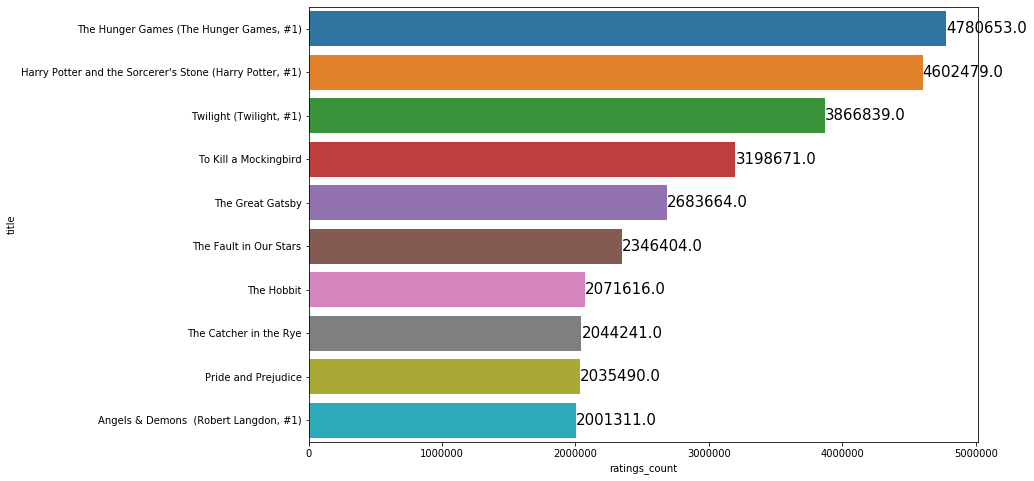

In [8]:
# Showing the top 10 books with the highest rating count
top10Books = df_books.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
plot_dims = (12, 8)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(top10Books, top10Books.index)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 15, color = 'k')
    
plt.show()

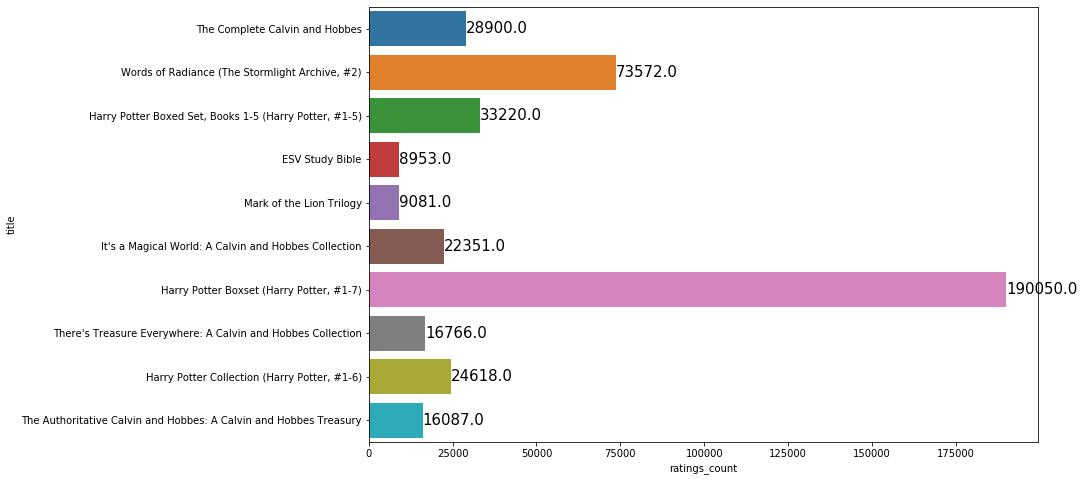

In [9]:
# Showing the top 10 books with the highest average rating and how many reviews count they got
top10Books = df_books.nlargest(10, ['average_rating']).set_index('title')['ratings_count']
plot_dims = (12, 8)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(top10Books, top10Books.index)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 15, color = 'k')
    
plt.show()

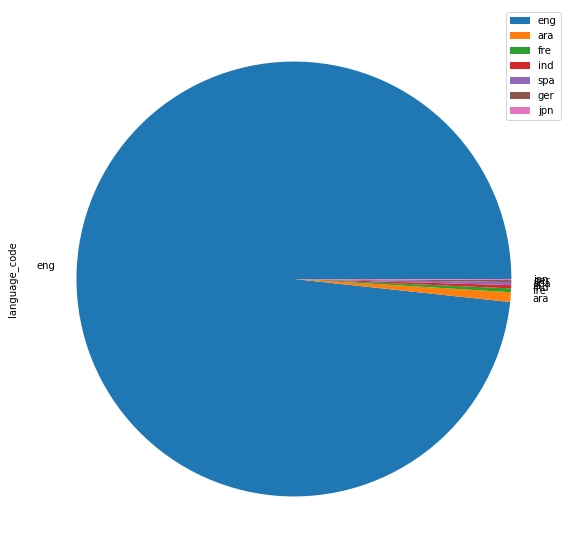

In [10]:
# Show the language code percentage in the dataset
df_books['language_code'].value_counts().head(7).plot(kind = 'pie', figsize=(10, 10)).legend()
plt.show()

In [11]:
# adding counter column so we can use it to do counting
df_books['count'] = 1 

In [12]:
# count the total number of books in each language
df_books['language_code'].value_counts()

eng    8726
ara      64
fre      25
ind      21
spa      20
ger      13
jpn       7
per       7
pol       6
por       6
en        4
dan       3
nor       3
fil       2
ita       2
tur       1
swe       1
nl        1
mul       1
rus       1
vie       1
rum       1
Name: language_code, dtype: int64

In [13]:
# the book with the highest number of rating count, which is 4780653 in total
df_books.sort_values(by='ratings_count' ,ascending=False).head(5)

,book_id,goodreads_book_id,authors,original_publication_year,title,language_code,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,count
0,1,2767052,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,66715,127936,560092,1481305,2706317,1
1,2,3,J.K. Rowling,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,75504,101676,455024,1156318,3011543,1
2,3,41865,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",eng,3.57,3866839,456191,436802,793319,875073,1355439,1
3,4,2657,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671,60427,117415,446835,1001952,1714267,1
4,5,4671,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664,86236,197621,606158,936012,947718,1


In [14]:
# the book with the highest book_average_rating
df_books.sort_values(by='average_rating' ,ascending=False).head(5)

,book_id,goodreads_book_id,authors,original_publication_year,title,language_code,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,count
3627,3628,24812,Bill Watterson,2005.0,The Complete Calvin and Hobbes,eng,4.82,28900,120,154,693,3117,25884,1
3274,3275,8,J.K. Rowling,2003.0,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",eng,4.77,33220,317,233,978,3686,28210,1
861,862,17332218,Brandon Sanderson,2014.0,"Words of Radiance (The Stormlight Archive, #2)",eng,4.77,73572,154,404,2653,18272,86693,1
8853,8854,95602,Francine Rivers,1993.0,Mark of the Lion Trilogy,eng,4.76,9081,27,61,323,1363,7773,1
7946,7947,5031805,Anonymous,2002.0,ESV Study Bible,eng,4.76,8953,98,90,367,1152,9077,1


In [15]:
# the authors with highests publishing books
df_books.groupby(['authors']).count()['count'].sort_values(ascending=False).head(10)

authors
James Patterson    98
Stephen King       80
Nora Roberts       62
Dean Koontz        52
Terry Pratchett    48
Agatha Christie    42
J.D. Robb          41
Janet Evanovich    37
Meg Cabot          37
John Grisham       34
Name: count, dtype: int64

In [16]:
# Data analyst on df_ratings dataset

In [17]:
# showing how many readers contributed to the rating datasets
df_ratings['user_id'].nunique()

53424

In [18]:
# showing how many unique books these readers have rated
df_ratings['book_id'].nunique()

10000

In [19]:
# Over 53,000 users contributed to a total of almost 6 million ratings, for a selection of 10,000 books
df_ratings.agg(['count', 'size', 'nunique'])

,user_id,book_id,rating
count,5976479,5976479,5976479
size,5976479,5976479,5976479
nunique,53424,10000,5


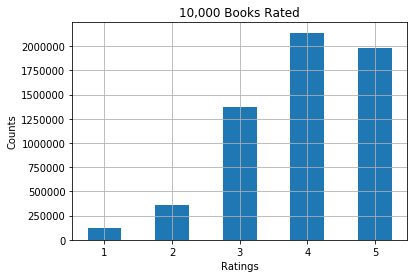

In [20]:
# Showing the total review count for each ratings: rating 1 - 5
plt.hist(df_ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],rwidth=0.5);
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('10,000 Books Rated')
plt.grid(True)
plt.savefig('book_ratings.png');
plt.show()

In [21]:
# Majority of the ratings are 4 and 5 stars

In [22]:
# showing the total number of reviews that has rating of 4 or rating of 5
df_ratings[(df_ratings['rating']==4)|(df_ratings['rating']==5)].count()[0]

4122111

In [23]:
# Showing the total percentage of ratings that are 4 or 5 ratings, which accounts for nearly 69% of all the reviews
print("Percentage of 4 or 5 ratings:",\
      (df_ratings[(df_ratings['rating']==4)|(df_ratings['rating']==5)].count()[0]/df_ratings['rating'].count()))

Percentage of 4 or 5 ratings: 0.6897223264734972


In [24]:
# Group the records in the ratings dataset by their user_id and count the total number of review each user gives
number_reader_ratings=df_ratings.groupby('user_id')['rating'].count().sort_values()

In [25]:
# Showing the total number of review each user gives
number_reader_ratings

user_id
34590     19
43675     20
40753     21
51725     21
32128     21
        ... 
12381    199
28158    199
52036    199
12874    200
30944    200
Name: rating, Length: 53424, dtype: int64

In [26]:
# Describe the mean, std, percentiles, max for the number_reader_ratings dataframe
number_reader_ratings.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: rating, dtype: float64

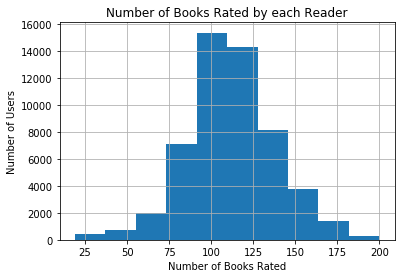

In [27]:
# Plot the rating data into a distribution
plt.hist(number_reader_ratings);
plt.xlabel('Number of Books Rated')
plt.ylabel('Number of Users')
plt.title('Number of Books Rated by each Reader')
plt.grid(True)
plt.savefig('number_rated.png');
plt.show()

In [28]:
# The dataset shows that each readers have rated at least 19 books and 200 the maximum, with median 111 

In [29]:
# Groupby their unique book_id and count the total number of rating for each book_id and sort them
number_book_ratings=df_ratings.groupby('book_id')['rating'].count().sort_values(ascending=False)

In [30]:
# Showing the total number of review each book receive from highest to lowest
number_book_ratings

book_id
1       22806
2       21850
4       19088
3       16931
5       16604
        ...  
9315       36
1935       33
9486       24
9345       11
7803        8
Name: rating, Length: 10000, dtype: int64

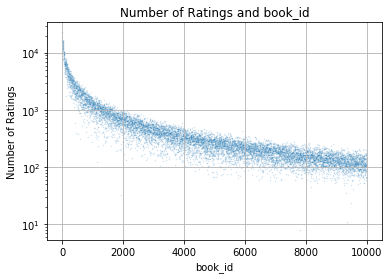

In [31]:
# Putting the book ID on the x axis and the total rating count on the y axis
# Trying to find the correlation between book_id and its total number of ratings count
x=list(number_book_ratings.sort_index().index)
y=list(number_book_ratings.sort_index())
# Plot

plt.scatter(x,y,s=0.2,alpha=0.2)
plt.title('Number of Ratings and book_id')
plt.xlabel('book_id')
plt.ylabel('Number of Ratings')
plt.yscale('log')

plt.grid(True)
plt.savefig('number_rated_bookid.png');
plt.show()

In [32]:
# Looking at the graph, tt is clear that there is a strong correlation between the book_id 
# and the number of times the book was rated. The smaller the book_id number is,
# the higher its rating count is. It is most likely due to the early entry


In [33]:
# Showing the total count, mean, std, percentiles, and max for number_book_ratings dataframe
number_book_ratings.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: rating, dtype: float64

In [34]:
# Creating the x axis variable using all the book_id
bookcount=range(1, 10001)

In [35]:
bookcount

range(1, 10001)

In [36]:
# Show the total review count for each book
number_book_ratings

book_id
1       22806
2       21850
4       19088
3       16931
5       16604
        ...  
9315       36
1935       33
9486       24
9345       11
7803        8
Name: rating, Length: 10000, dtype: int64

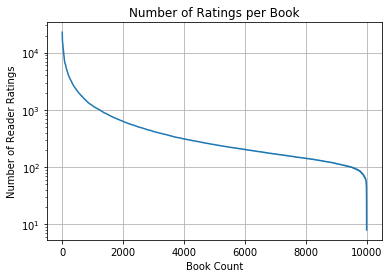

In [37]:
# Showing the distribution of book rating count
plt.plot(bookcount, number_book_ratings)
plt.xlabel('Book Count')
plt.ylabel('Number of Reader Ratings')
plt.title('Number of Ratings per Book')
plt.yscale('log')
plt.grid(True)
plt.show()

In [38]:
# As it can be seen from the plot, most books have been rated by 100 to 1000 readers.

In [39]:
# showing the five records from ratings dataset for book_id 260
df_ratings[df_ratings['book_id']==260].head()

,user_id,book_id,rating
2,2,260,5
9270,401,260,3
12722,533,260,4
48584,1642,260,4
53818,1810,260,4


In [40]:
# Showing the rating count for book_id 260, a total of one star to five stars reviews
df_ratings[df_ratings['book_id']==260]['rating'].value_counts()

5    612
4    590
3    386
2    125
1     54
Name: rating, dtype: int64

In [41]:
# The total rating count for book_id 260 is 282623 in the df_books dataset, which is different from
# the total review count for ratings dataset
df_books[df_books['book_id']==260]

,book_id,goodreads_book_id,authors,original_publication_year,title,language_code,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,count
259,260,4865,Dale Carnegie,1936.0,How to Win Friends and Influence People,eng,4.13,282623,6734,13880,50529,94743,139551,1


In [42]:
# The ratings in df_ratings and in df_books datasets are different. 
# In the recommendation algorithm, we will use the ratings from df_rating dataset
# The rating in df_book includes non-registered readers
# The book_id reference matches in both dataframes

In [43]:
# A total of 22 unique language code
df_books['language_code'].describe()

count     8916
unique      22
top        eng
freq      8726
Name: language_code, dtype: object

In [44]:
# All the unique language code
df_books['language_code'].unique()

array(['eng', nan, 'spa', 'fre', 'nl', 'ara', 'por', 'ger', 'nor', 'jpn',
       'en', 'vie', 'ind', 'pol', 'tur', 'dan', 'fil', 'ita', 'per',
       'swe', 'rum', 'mul', 'rus'], dtype=object)

In [45]:
# Approximately 1100 of them have unknown language code
df_books['language_code'].isnull().value_counts()

False    8916
True     1084
Name: language_code, dtype: int64

In [46]:
# The total count for each language code
df_books['language_code'].value_counts()

eng    8726
ara      64
fre      25
ind      21
spa      20
ger      13
jpn       7
per       7
pol       6
por       6
en        4
dan       3
nor       3
fil       2
ita       2
tur       1
swe       1
nl        1
mul       1
rus       1
vie       1
rum       1
Name: language_code, dtype: int64

In [47]:
# Majority of the books are in English

In [48]:
# Creating user profile

In [ ]:
# Creating user profile by entering book_id and their ratings
user_ratings = {}
booklist = [2063,11,1644,136,6665,35,33,10,4,1521,70,36,32,13,66,2002,43]
rating = [4,5,5,5,4,5,4,4,5,5,5,4,4,4,4,5,4,]

for key in booklist: 
    for value in rating: 
        user_ratings[key] = value 
        rating.remove(value) 
        break 
print(user_ratings)

# create a list with all the book id for the books that user had entered
booklist = []
for x in user_ratings.keys():
    booklist.append(x)

# for testing, creating testing user_book
get_book_titles(booklist)

In [ ]:
# Creating get_book_titles function 
# Enter a list of book ID ex: [4, 5, 10000], the function will return 
# {4: 'To Kill a Mockingbird - by: Harper Lee',
# 5: 'The Great Gatsby - by: F. Scott Fitzgerald',
# 10000: 'The First World War - by: John Keegan'}

def get_book_titles(booklist):
    '''
    INPUT: book list
    OUTPUT: dictionary with titles
    '''
    
    df_mask=df_books[df_books['book_id'].isin(booklist)][['book_id','title','authors']]
    titles_dict = dict(zip(df_mask['book_id'], df_mask['title'].str.cat(df_mask[['authors']], sep=' - by: ')))
    
    return titles_dict

In [52]:
# Finding similar readers using cosine_similarity, matrix factorization
def weighted_mean(df_ratings, user_ratings, sample_size = 100):
    
    '''   
    INPUT:
    - df_ratings: dataframe containing book ratings. Ratings arranged by columns: user_id; book_id; rating.
    - user_ratings: dictionary containing user's book ratings. Arranged by book_id (key) and rating (value).
    - sample_size: integer. Size of random sample from all the readers' ratings.
    
    OUTPUT:
    - book_wmeans: dictionary containing weighted means for every book that the user has not already rated.
      Arranged by book_id (key), and rating (value) in descending order.
    '''
    
    #randomly select a sample of size "sample_size" among the 53,424 readers.
    random.seed(6)
    random_ids=random.sample(list(df_ratings['user_id'].unique()),sample_size) #randomly select a sample of 
    
    #unstack the readers' ratings to a dataframe containing book ratings.
    #Ratings arranged by readers (rows) and books (columns).
    df_reader_ratings=df_ratings[df_ratings['user_id'].isin(random_ids)].\
                                                    groupby(['user_id', 'book_id'])['rating'].max().unstack()
           
    #Add a new row "0" for the User.
    df_reader_ratings.loc[0] = None

    #Sort df_reader_ratings index so that the new row "0" is shown at the top:
    df_reader_ratings=df_reader_ratings.sort_index()

    #Populate row "0" according to the user's ratings included in user_ratings.
    for key in list(user_ratings.keys()):        
        df_reader_ratings.loc[0][key]=user_ratings.get(key)
        
    #create a copy of the unstacked dataframe filling all NaN values with zero's.
    df_reader_ratings_dummy=df_reader_ratings.copy().fillna(0)
    
    #create a matrix with all the cosine similarities between readers.
    cosine_ratings=cosine_similarity(df_reader_ratings_dummy,df_reader_ratings_dummy)
    
    #create a dataframe from the cosine_ratings matrix. Rows = users; Columns = users.
    cosine_ratings=pd.DataFrame(cosine_ratings,index=df_reader_ratings.index,columns=df_reader_ratings.index)
    
    #dictionary to contain weighted means for each book. 
    book_wmeans={}
    
    #get a series containing the cosine similarity between User (row 0) and every other user     
    cosine_reader=cosine_ratings[0]
            
    #For every book with rating:
    for book in list(df_reader_ratings.columns):
        
    #If book has not already been rated by the user:
        if book not in list(user_ratings.keys()):

            #ratings of the book in iteration by all readers.
            reader_ratings=df_reader_ratings[book] #all of the reader ratings for given book 'book'

            #index containing the rreaders with NaN ratings for the book in iteration.        
            #https://stackoverflow.com/questions/14016247/find-integer-index-of-rows-with-nan-in-pandas-dataframe
            idx_nans = reader_ratings[reader_ratings.isnull()].index #which indices contained NaNs
    
            #ratings of the book in iteration by all readers without any NaNs.
            reader_ratings=df_reader_ratings[book].dropna()

            #remove the readers identified with NaN values for the book in iteration.
            cosine_book=cosine_reader.drop(index=idx_nans)
        
            #carry out the dot product between both series. These do not contain NaN values.
            wmean_rating=np.dot(cosine_book,reader_ratings)/cosine_reader.sum()

            #include weighted mean in dictionary.
            book_wmeans.update({book:wmean_rating})
    
    #sort dictionary value items in descending order.
    book_wmeans=sorted(book_wmeans.items(), key=operator.itemgetter(1),reverse=True)
    
    return book_wmeans

In [54]:
# Running the book_wmeans function
book_wmeans=weighted_mean(df_ratings, user_ratings, sample_size = 100)

In [55]:
# returning result from weighted_mean function
book_recommends=list(map(itemgetter(0), book_wmeans))

In [56]:
# Testing the accuracy of the recommendation list, calculating precision and recall 

In [57]:
# Setting test size to 10
test_size = 10

In [62]:
# Creating recommendation list
def recommends_score (df_ratings,sample_size=10,test_size=100):

    random.seed(6)
    
    random_ids=random.sample(list(df_ratings['user_id'].unique()),test_size) #randomly select a sample of 100 entries  

    accuracy=[]
    
    for id in random_ids:
        #create small dataframe containing the random_id user's ratings:
        df_user=df_ratings[df_ratings['user_id']==id]
         
        msk = np.random.rand(len(df_user)) < 0.5
        df_val = df_user[msk] #keep this away for validation
        df_test = df_user[~msk] #to feed into engine
        
        #store the random_id user's book_ids and ratings in a dictionary:
        val_ratings=pd.Series(df_val['rating'].values,index=df_val['book_id']).to_dict() #validation and unseen
        test_ratings=pd.Series(df_test['rating'].values,index=df_test['book_id']).to_dict() #feed test data to engine
        
        #random user_id maximum rating (likely to return "5", sometimes "4").
        max_rating=max(test_ratings.items(), key=operator.itemgetter(1))[1]
       
        #the dataframe to feed into engine should exclude the random user's data already contained there.
        df_ratings=df_ratings[df_ratings['user_id']!=id]
        
        #feed test data to engine    
        wmeans_test=weighted_mean(df_ratings, test_ratings, sample_size)
   
        #validation data top rated books
        val_best=[]
        for key, value in val_ratings.items():
            if value == max_rating:
                val_best.append(key)
        
        test_best=[]
        #make a list from the weighted_mean output best books. The length is made the same as the validation data
        test_best=list(map(itemgetter(0), wmeans_test))[:len(val_best)] 

        overlap = set(test_best) & set(val_best)
        
        if len(test_best)>0:
            #add accuracy score for random user into a list
            acc=float(len(overlap)/len(test_best))
                
        else:
            acc=0

        accuracy.append(acc)
        
    #return a list with all the accuracy values from randomly selected samples
    
    return accuracy

In [61]:
# Calculating the accuracy of the book recommendation engine
def create_df_tests():
    
    samples_list=[]
    accuracy_list=[]
    time_list=[]
    
    for samples in range (10,100,20):
        
        start_time = time.time()

        accuracy=recommends_score(df_ratings,sample_size=samples)
    
        elapsed_time = time.time() - start_time
        
        print("Number of Readers comparisons used:", samples)
        samples_list.append(samples)

        print("Mean accuracy from 20 tests from random users:", mean(accuracy))
        accuracy_list.append(mean(accuracy))

        print("Simulation time per test",elapsed_time/test_size)
        time_list.append(elapsed_time)
    
    df_tests = pd.DataFrame(list(zip(samples_list,accuracy_list, time_list)), columns =['samples','accuracy', 'time'])
    
    return df_tests

In [63]:
# Testing the accuracy of the book recommendation engine
df_tests = create_df_tests()

Number of Readers comparisons used: 10
Mean accuracy from 20 tests from random users: 0.06673557719834917
Simulation time per test 12.482037019729614
Number of Readers comparisons used: 30
Mean accuracy from 20 tests from random users: 0.09902683882347936
Simulation time per test 27.13494782447815
Number of Readers comparisons used: 50
Mean accuracy from 20 tests from random users: 0.09946960972443399
Simulation time per test 40.380314683914186
Number of Readers comparisons used: 70
Mean accuracy from 20 tests from random users: 0.10058333023964251
Simulation time per test 51.39643568992615
Number of Readers comparisons used: 90
Mean accuracy from 20 tests from random users: 0.11444782419426472
Simulation time per test 63.88310101032257


In [64]:
df_tests.head()

,samples,accuracy,time
0,10,0.066736,124.820370
1,30,0.099027,271.349478
2,50,0.099470,403.803147
3,70,0.100583,513.964357
4,90,0.114448,638.831010


In [65]:
df_tests.tail()

,samples,accuracy,time
0,10,0.066736,124.820370
1,30,0.099027,271.349478
2,50,0.099470,403.803147
3,70,0.100583,513.964357
4,90,0.114448,638.831010


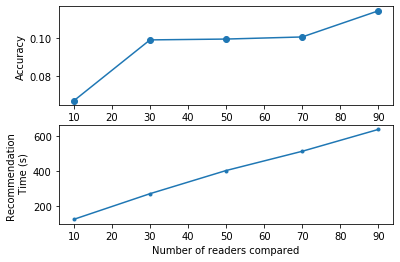

In [66]:
# Plotting the testing result, as the number of readers compared, the accuracy goes up
# However, increasing the number of readers size would requires much longer run time
x1 = df_tests['samples']

y1 = df_tests['accuracy']
y2 = df_tests['time']

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('')
plt.ylabel('Accuracy')

plt.subplot(2, 1, 2)
plt.plot(x1, y2, '.-')
plt.xlabel('Number of readers compared')
plt.ylabel('Recommendation \n \
Time (s)')

plt.savefig('testing_times.png');
plt.show()